In [2]:
%pip install opencv-python


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.2/62.2 MB 20.9 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [12]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt

from glob import glob

import IPython.display as ipd
from tqdm import tqdm

import subprocess

plt.style.use('ggplot')

In [5]:
import cv2

# Open the video file
video = cv2.VideoCapture("Camera Footage __ If you drink and drive, you can harm others_So please don't drink while driving.mp4")

# Get the total number of frames in the video
total_frames = int(video.get(cv2.CAP_PROP_FRAME_COUNT))

print(f"Total frames in the video: {total_frames}")

# # Release the video capture object
# video.release()


Total frames in the video: 4041


In [6]:
# Video height and width
height = int(video.get(cv2.CAP_PROP_FRAME_HEIGHT))
width = int(video.get(cv2.CAP_PROP_FRAME_WIDTH))
print(f'Height {height}, Width {width}')

Height 720, Width 1270


In [7]:
# Get frames per second
fps = video.get(cv2.CAP_PROP_FPS)
print(f'FPS : {fps:0.2f}')

FPS : 24.00


In [8]:
# Release the video capture object
video.release()


In [9]:
cap = cv2.VideoCapture("Camera Footage __ If you drink and drive, you can harm others_So please don't drink while driving.mp4")
ret, img = cap.read()
print(f'Returned {ret} and img of shape {img.shape}')

Returned True and img of shape (720, 1270, 3)


In [10]:
## Helper function for plotting opencv images in notebook
def display_cv2_img(img, figsize=(10, 10)):
    img_ = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    fig, ax = plt.subplots(figsize=figsize)
    ax.imshow(img_)
    ax.axis("off")

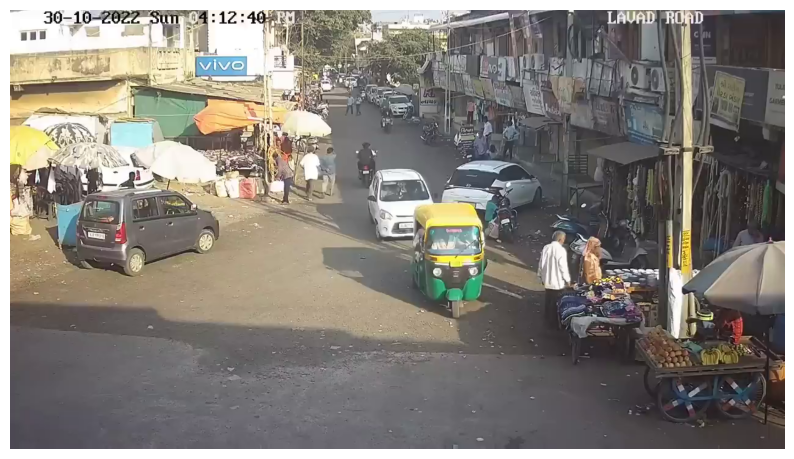

In [13]:
display_cv2_img(img)


In [9]:
!pip3 install opencv-contrib-python


  Using cached opencv_contrib_python-4.9.0.80-cp37-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (68.3 MB)


In [3]:
import cv2
import requests
import os
import time
import uuid

# Custom Vision prediction endpoint and key
ENDPOINT = "https://westus2.api.cognitive.microsoft.com/customvision/v3.0/Prediction/686c36cd-ca42-41f2-b31b-cd33af265640/detect/iterations/vehicle-detection/image"
PREDICTION_KEY = "93ca6a14c7cf44dc97082434fc48371f"

# Set the video file name
video_file = "Camera Footage __ If you drink and drive, you can harm others_So please don't drink while driving.mp4"

# Extract frames from the video
def extract_frames(video_path, frame_interval=1):
    cap = cv2.VideoCapture(video_path)
    frame_count = 0
    frames = []
    
    while cap.isOpened():
        ret, frame = cap.read()
        if ret:
            if frame_count % frame_interval == 0:
                frame_file = f"frame{frame_count}.jpg"
                cv2.imwrite(frame_file, frame)
                frames.append(frame_file)
        else:
            break
        frame_count += 1
    
    cap.release()
    return frames

# Call Custom Vision API to detect objects in a frame
def detect_objects(frame_path):
    url = ENDPOINT 
    headers = {
        'Content-Type': 'application/octet-stream', 
        'Prediction-Key': PREDICTION_KEY
    }
    
    with open(frame_path, 'rb') as f:
        response = requests.post(url, headers=headers, data=f)
        response.raise_for_status()
        detections = response.json()['predictions']
        
    return detections

# Draw bounding boxes on frame based on detections
def draw_boxes(frame, detections):
    for detection in detections:
        if detection['probability'] > 0.5:
            left = int(detection['boundingBox']['left'] * frame.shape[1])
            top = int(detection['boundingBox']['top'] * frame.shape[0])
            width = int(detection['boundingBox']['width'] * frame.shape[1])
            height = int(detection['boundingBox']['height'] * frame.shape[0])
            
            cv2.rectangle(frame, (left, top), (left+width, top+height), (0, 255, 0), 2)
            cv2.putText(frame, f"{detection['tagName']} ({detection['probability']:.2f})", 
                        (left, top-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)
    
    return frame

# Main execution
def main():
    # Extract frames from video
    frames = extract_frames(video_file)
    
    # Create output video writer
    output_file = f"output_{str(uuid.uuid4())[:8]}.mp4"
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    fps = 30
    width = int(cv2.VideoCapture(video_file).get(cv2.CAP_PROP_FRAME_WIDTH))  
    height = int(cv2.VideoCapture(video_file).get(cv2.CAP_PROP_FRAME_HEIGHT))
    out = cv2.VideoWriter(output_file, fourcc, fps, (width, height))
    
    # Process each frame
    for frame_path in frames:
        # Detect objects in frame
        detections = detect_objects(frame_path)
        
        # Draw detection boxes on frame 
        frame = cv2.imread(frame_path)
        frame = draw_boxes(frame, detections)
        
        # Write frame to output video
        out.write(frame)
        
        # Delete frame file
        os.remove(frame_path)
        
    out.release()
    print(f"Output video saved as {output_file}")

if __name__ == "__main__":
    main()


Bad pipe message: %s [b'\x0cNzX\xf1\xe5\x02=1\x1f\xb3\xb3\xe8\xed\x08\xa82A \xa3al\x93J\xecI\xba\t\xa6\x92!\xe6\x18\x15B\x84\xb7 \\\xc6\xe3r\xb7\xb3[\x81\xf1\x9d\xfb\xda\xa2\x00\x08\x13\x02\x13\x03\x13\x01\x00\xff\x01\x00\x00\x8f\x00\x00\x00\x0e\x00\x0c\x00\x00\t127.0.0.1\x00\x0b\x00\x04\x03\x00\x01\x02\x00\n\x00\x0c\x00\n\x00\x1d\x00\x17\x00\x1e\x00', b'\x18\x00#\x00\x00\x00\x16\x00\x00\x00\x17\x00\x00\x00\r\x00\x1e\x00\x1c\x04\x03\x05\x03\x06']
Bad pipe message: %s [b'\x07\x08']
Bad pipe message: %s [b'\t\x08\n\x08\x0b\x08\x04']
Bad pipe message: %s [b'\x08\x06\x04\x01\x05\x01\x06', b'']
Bad pipe message: %s [b'\xba\xc8\x99d\xc7\xfe8.R\x92?z,Dso\xfc\x8a \x1c\xaaum\x91\x19\x14\xa8\xe4\xc4\xea\xf3\rq\xceq\x00f\xc8G]Z\xa9\xbd;C\x08\xde\xc2\\KH\x00\x08\x13\x02\x13\x03\x13\x01\x00\xff\x01\x00\x00\x8f\x00\x00\x00\x0e\x00\x0c\x00\x00\t127.0.0.1\x00\x0b\x00\x04\x03\x00\x01\x02\x00\n\x00\x0c\x00\n\x00\x1d\x00\x17\x00\x1e\x00\x19\x00\x18\x00#\x00\x00\x00\x16\x00\x00\x00\x17\x00\x00\x00\r\x00\x

Output video saved as output_a8ff31eb.mp4
